In [10]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [11]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HSG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [12]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [13]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[27660.4867008  27668.17663026 27675.86655972 27683.55648918
 27691.24641864 27698.9363481  27706.62627756 27714.31620702
 27722.00613648 27729.69606594 27737.3859954  27745.07592486
 27752.76585432 27760.45578378 27768.14571324 27775.83564269
 27783.52557215 27791.21550161 27798.90543107 27806.59536053
 27814.28528999 27821.97521945 27829.66514891 27837.35507837
 27845.04500783 27852.73493729 27860.42486675 27868.11479621
 27875.80472567 27883.49465513]


In [15]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 20090.740185378087
Testing MAPE: 347.92937039875216
Testing MAE: 19977.791368576836


In [16]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[27660.4867008  27668.17663026 27675.86655972 27683.55648918
 27691.24641864 27698.9363481  27706.62627756 27714.31620702
 27722.00613648 27729.69606594 27737.3859954  27745.07592486
 27752.76585432 27760.45578378 27768.14571324 27775.83564269
 27783.52557215 27791.21550161 27798.90543107 27806.59536053
 27814.28528999 27821.97521945 27829.66514891 27837.35507837
 27845.04500783 27852.73493729 27860.42486675 27868.11479621
 27875.80472567 27883.49465513 27891.18458459 27898.87451405
 27906.56444351 27914.25437297 27921.94430243 27929.63423189
 27937.32416135 27945.01409081 27952.70402026 27960.39394972
 27968.08387918 27975.77380864 27983.4637381  27991.15366756
 27998.84359702 28006.53352648 28014.22345594 28021.9133854
 28029.60331486 28037.29324432 28044.98317378 28052.67310324
 28060.3630327  28068.05296216 28075.74289162 28083.43282108
 28091.12275054 28098.81268    28106.50260946 28114.19253892
 28121.88246838 28129.57239784 28137.26

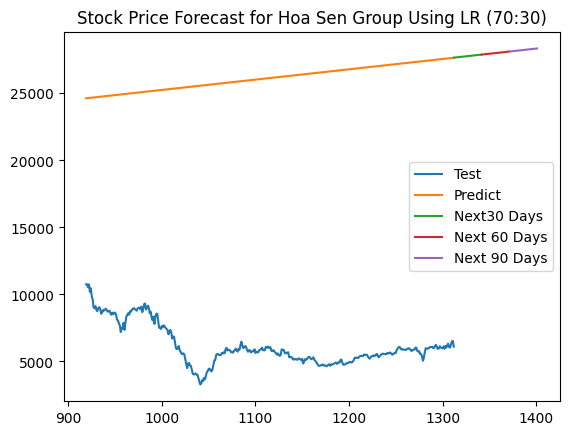

In [17]:
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hoa Sen Group Using LR (70:30)")
plt.show()

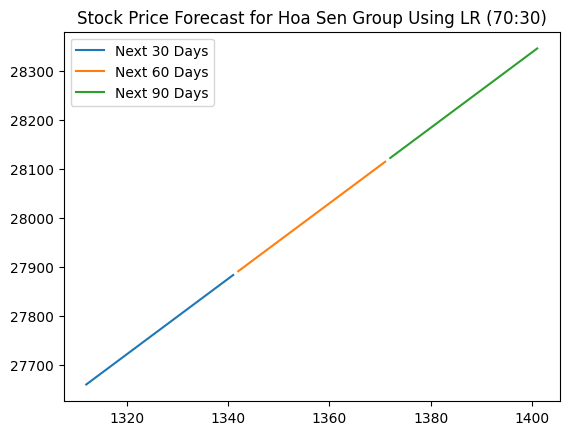

In [18]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Hoa Sen Group Using LR (70:30)")
plt.show()